In [40]:
# Visualize the DDPM process
import numpy as np 
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torchvision.utils as vutils

In [41]:
# q(x_t|x_0)
CIFAR10_DATA = CIFAR10(root="./data", transform=transforms.ToTensor())
BETA_0 = 1.0e-4
BETA_T = 0.02
T = 1000

In [59]:
def get_images(num):
    res = []
    for i, data in enumerate(CIFAR10_DATA):
        if i >=num:
            return torch.stack(res)
        res.append(data[0])

def display_imgs(imgs, normalize = False):
    if normalize:
        imgs = (imgs + 1)/2
    out = vutils.make_grid(imgs, nrow=4)
    plt.imshow(out.permute(1,2,0))

In [60]:
imgs = get_images(16)

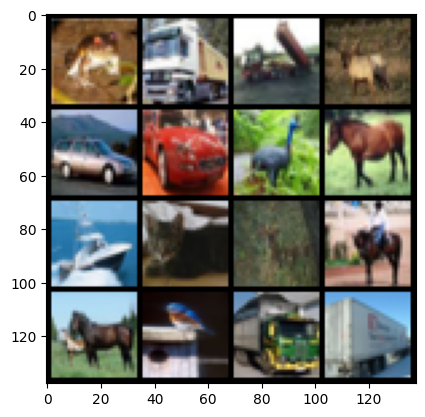

In [61]:
display_imgs(imgs)

In [ ]:
# Forward
def add_forward_noise(imgs, t):
    # imgs: [B, C, H, W] (0,1)
    betas = torch.linspace(BETA_0, BETA_T, T) # [T]
    alphas = 1 - betas # [T]
    alphas_bar = torch.cumprod(alphas, dim = 0) # [T]

    noise = torch.randn(imgs.shape)
    imgs = imgs * 2 - 1
    x_t = torch.sqrt(alphas_bar)[t] * imgs + torch.sqrt(1.-alphas_bar)[t] * noise
    return x_t


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


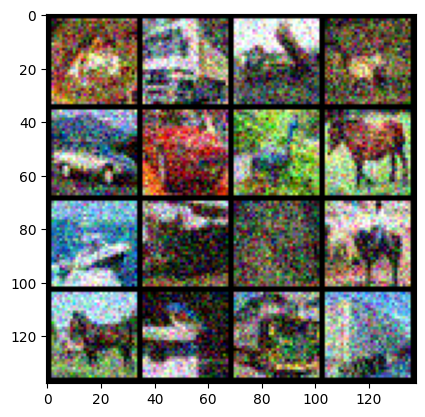

In [63]:
x_t = add_forward_noise(imgs, 100)
display_imgs(x_t, True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


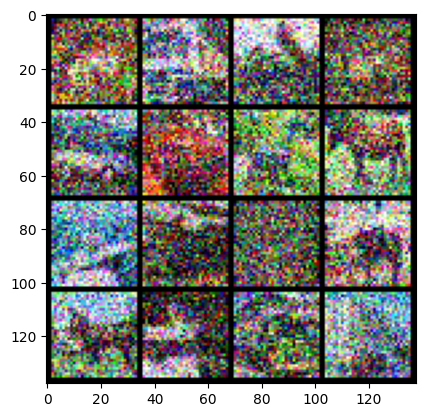

In [64]:
x_t = add_forward_noise(imgs, 200)
display_imgs(x_t, True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


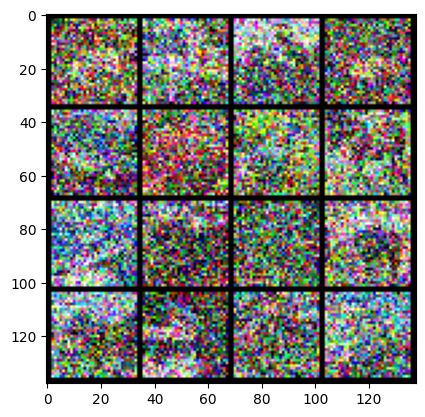

In [65]:
x_t = add_forward_noise(imgs, 300)
display_imgs(x_t, True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


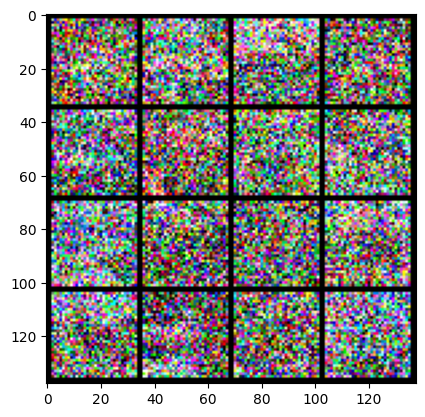

In [66]:
x_t = add_forward_noise(imgs, 400)
display_imgs(x_t, True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


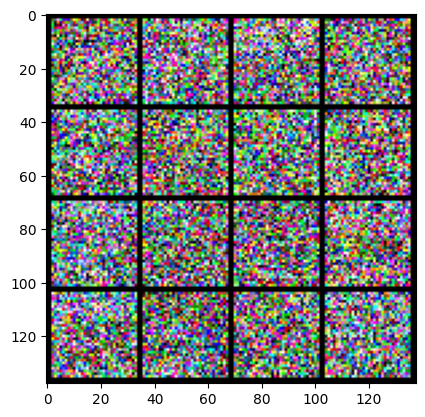

In [67]:
x_t = add_forward_noise(imgs, 500)
display_imgs(x_t, True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


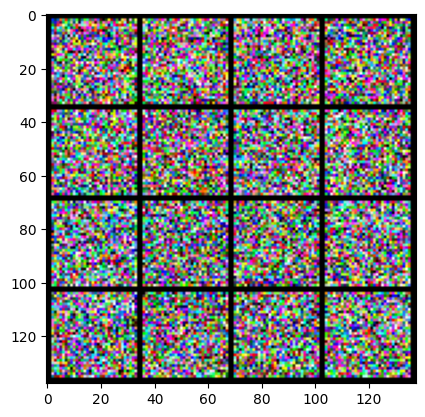

In [68]:
x_t = add_forward_noise(imgs, 600)
display_imgs(x_t, True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


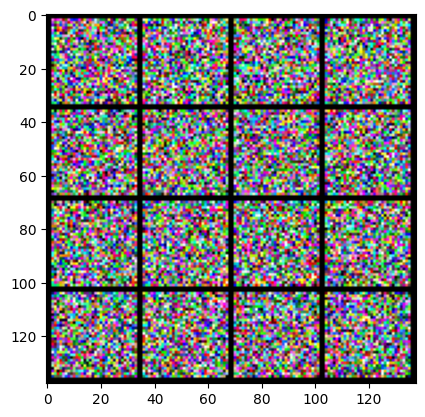

In [70]:
x_t = add_forward_noise(imgs, 999)
display_imgs(x_t, True)